# Sphere collapse

---

## Initial Data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
%config InlineBackend.figure_format='retina'

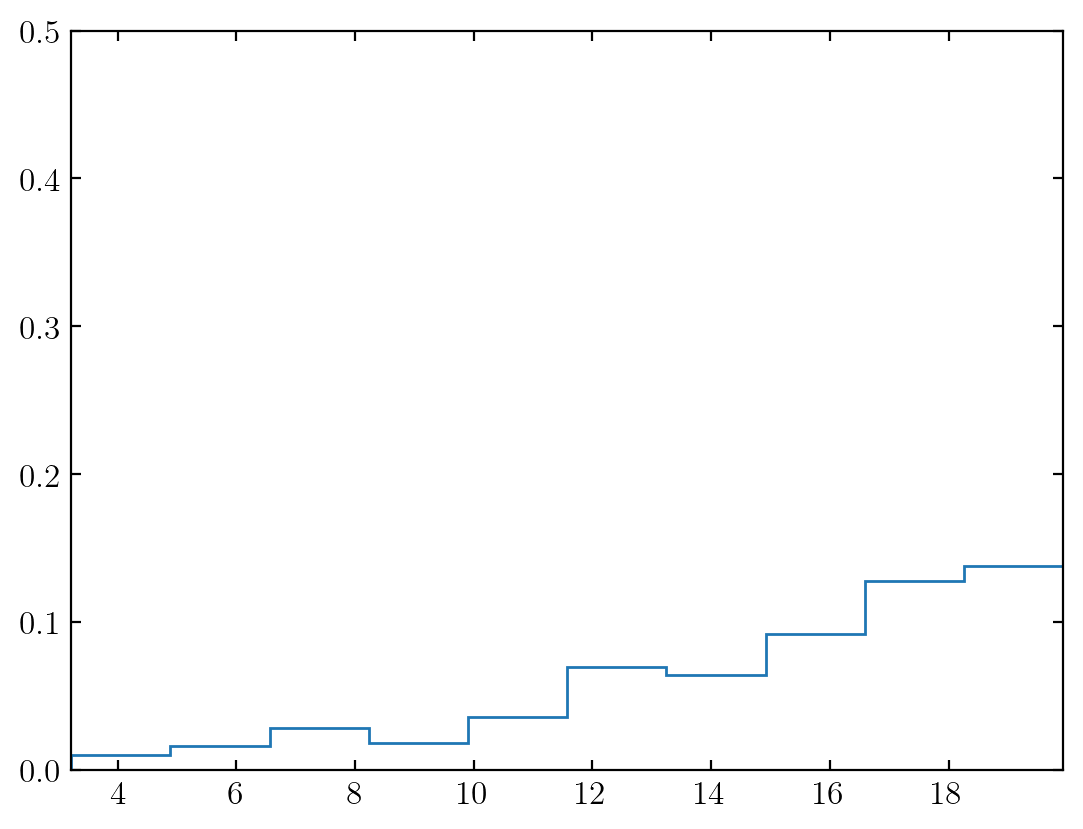

In [9]:
# generating initial points
N = int(3e2)

a = 20 #sphere radius

I = lambda x: a*x**(1/3)
P = np.random.uniform(0,1,N)

r = I(P)
theta = np.random.uniform(0, np.pi,N)
phi = np.random.uniform(0, 2*np.pi, N)

plt.hist(r, density = True, histtype = 'step')
plt.ylim([0,.5]);

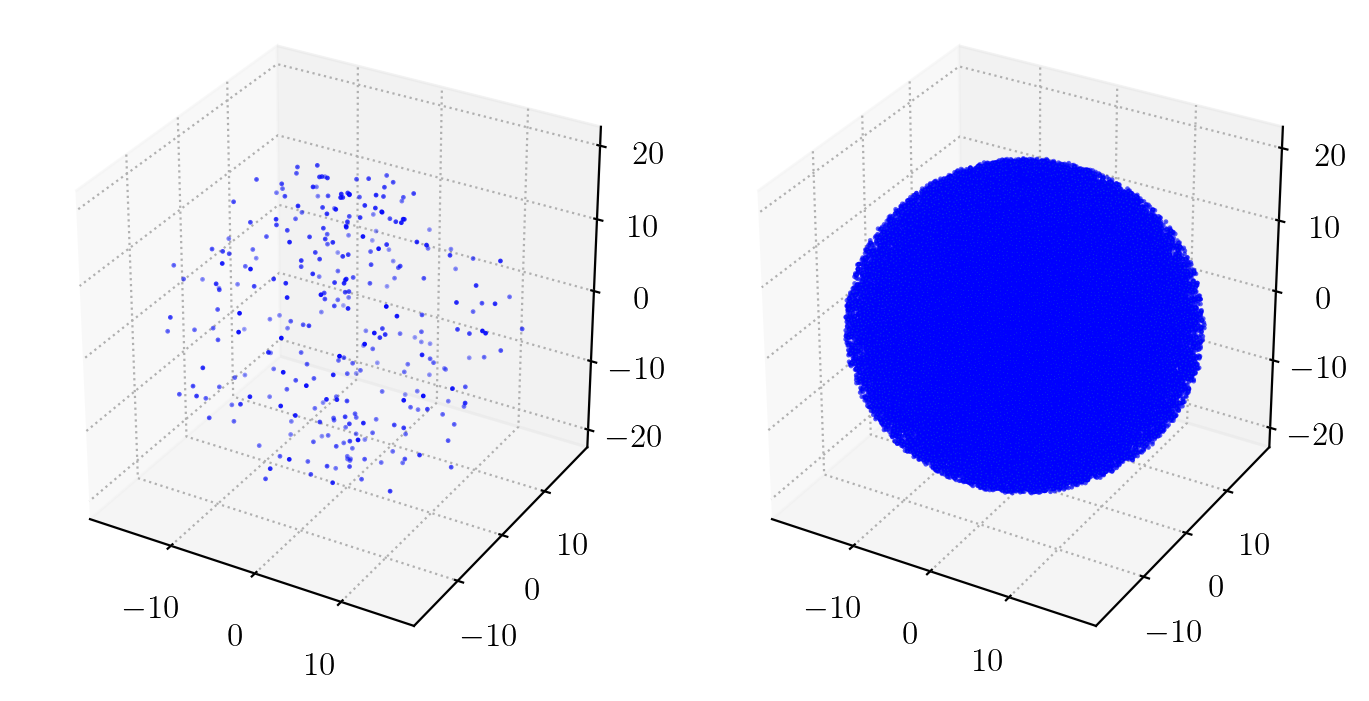

In [11]:
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

N_m = int(1e5)
P_m = np.random.uniform(0,1,N_m)

r_m = I(P_m)
theta_m = np.random.uniform(0,np.pi,N_m)
phi_m = np.random.uniform(0, 2*np.pi, N_m)


x_m = r_m*np.sin(theta_m)*np.cos(phi_m)
y_m = r_m*np.sin(theta_m)*np.sin(phi_m)
z_m = r_m*np.cos(theta_m)


fig, axs = plt.subplots(1,2, figsize = (7,7), tight_layout = True, subplot_kw={'projection': '3d'})
axs[0].set(aspect='equal')
axs[0].scatter(x,y,z, s = .5)
axs[1].set(aspect='equal')
axs[1].scatter(x_m,y_m,z_m, s =.5);

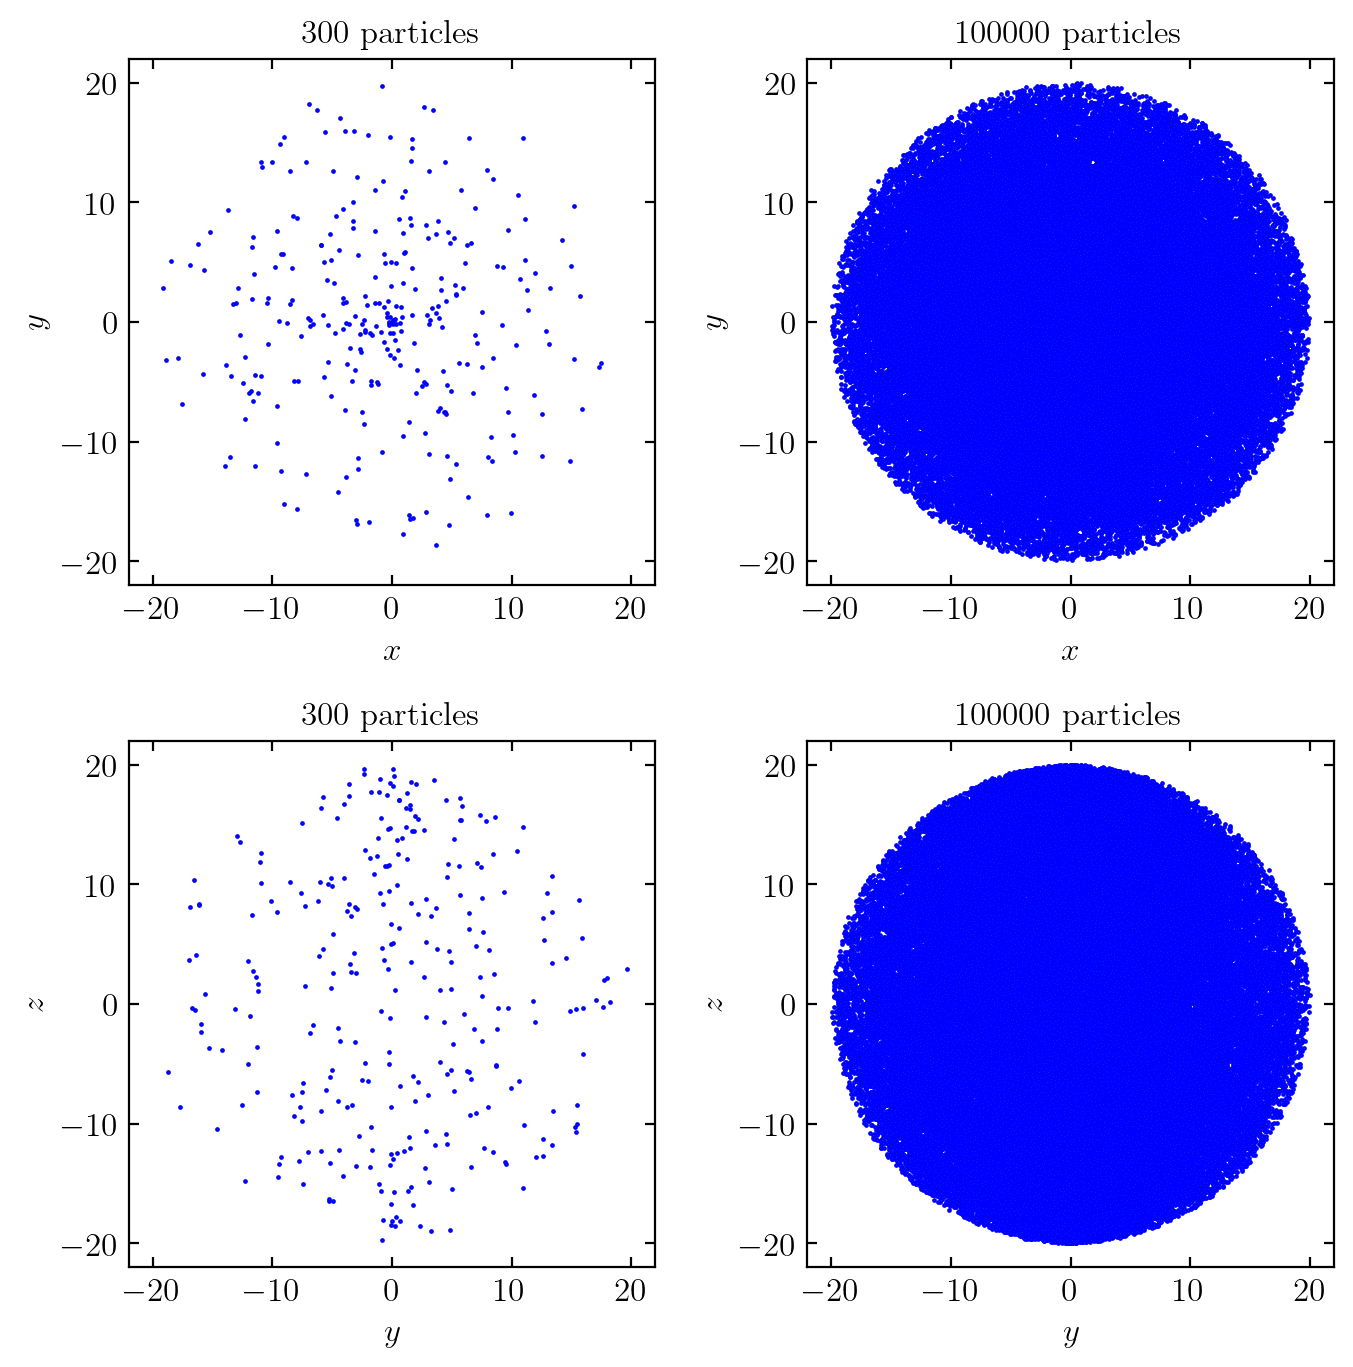

In [12]:
fig, axs = plt.subplots(2,2, figsize = (7,7), tight_layout = True)

for j in range(2):
    axs[0,j].set(xlabel = r'$x$', ylabel = r'$y$')
    axs[1,j].set(xlabel = r'$y$', ylabel = r'$z$')
    for i in range(2):
        axs[i,j].set(aspect='equal', xlim = [-22,22], ylim = [-22,22])
        axs[i,0].set(title = f'{N} particles')  
        axs[i,1].set(title = f'{N_m} particles')
    
axs[0,0].scatter(x,y, s = .5)
axs[1,0].scatter(y,z, s = .5)
axs[0,1].scatter(x_m,y_m, s = .5)
axs[1,1].scatter(y_m,z_m, s = .5);

In [5]:
# creating the input file
m = .5

with open ('in_data.txt', 'w+') as f:
    f.write(str(N) + '\n')
    f.write('0' + '\n')
    for i in range(N):
        f.write(f'{m} {x[i]} {y[i]} {z[i]} 0 0 0')
        f.write('\n')

---

## Data fetching and plots

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [14]:
lines = pd.read_csv('out_data.txt').to_numpy()
N_particles = N

s = N_particles + 2 #step

t = lines[0::s].astype(float)
l = np.array([])
mxv = []

for i in tqdm(range(1, s-1)):
    l = np.append(l, lines[i::s])
    mxv = np.array([x.split(' ') for x in l.ravel()],dtype=float)

  0%|          | 0/300 [00:00<?, ?it/s]

In [15]:
properties = 7

mxv = mxv.reshape(N_particles, len(t), properties)

#print(a)
#print(N_particles)
print(t.shape)
print(mxv.shape)

print(f"\n3D array containing all the particles at all times",
      f"\n{np.size(mxv, 0)} is the particles array", 
      f"\n{np.size(mxv, 1)} is the iterations array", 
      f"\n{np.size(mxv, 2)} the property array of each particle")

(200, 1)
(300, 200, 7)

3D array containing all the particles at all times 
300 is the particles array 
200 is the iterations array 
7 the property array of each particle


In [16]:
m = mxv[0,:,0] #mass is conserved through time
x = mxv[:,:,1]
y = mxv[:,:,2]
z = mxv[:,:,3]
vx = mxv[:,:,4]
vy = mxv[:,:,5]
vz = mxv[:,:,6]

print(m.shape)
print(x.shape)

(200,)
(300, 200)


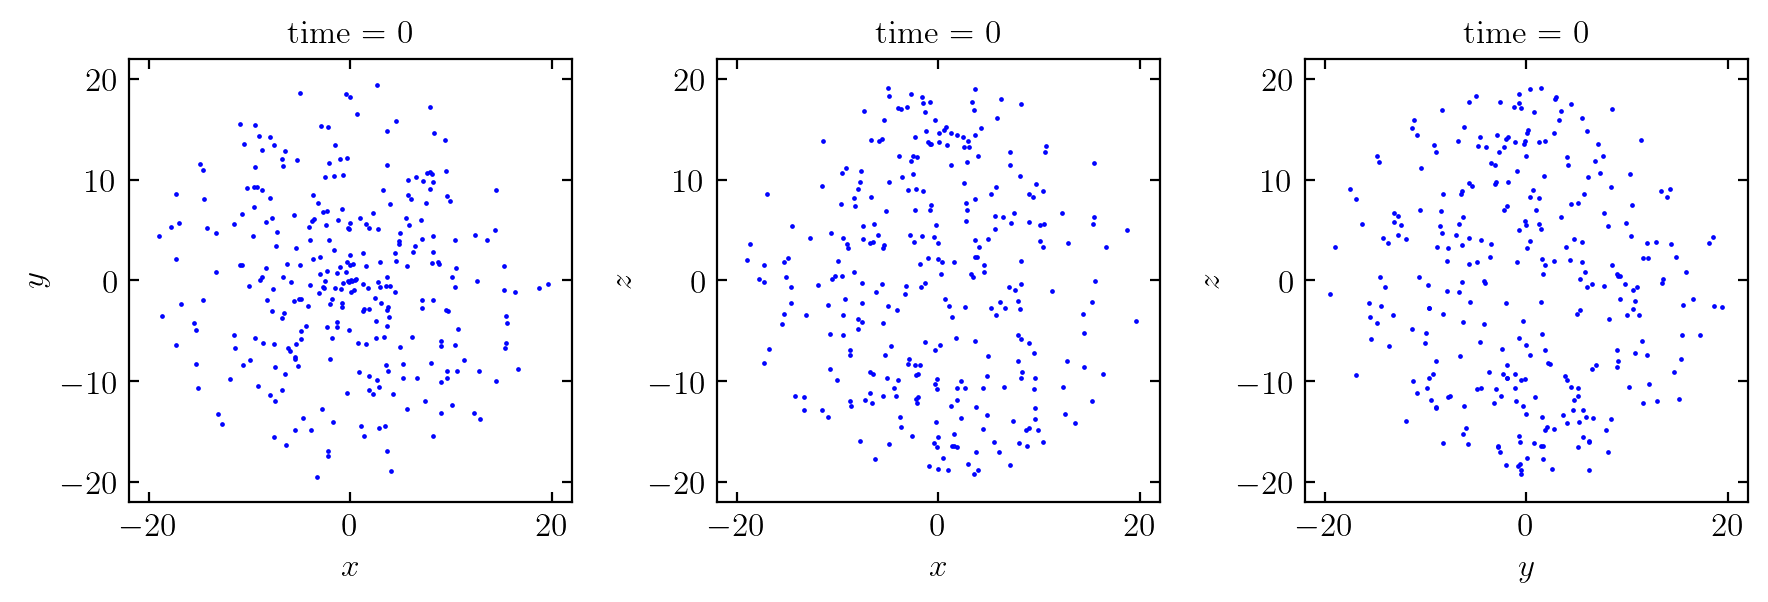

In [17]:
fig, axs = plt.subplots(1,3, figsize = (9,9), tight_layout = True)
t_i = 0

l = a+2

for i in range(3):
    axs[i].set(aspect='equal', xlim = [-l,l], ylim = [-l,l], title = f'time = {t_i}')

#don't get fooled by shape! the first entry are the particles not the time!
axs[0].scatter(x[:,t_i],y[:,t_i], s = .5)
axs[0].set(xlabel = r'$x$', ylabel = r'$y$')
axs[1].scatter(x[:,t_i],z[:,t_i], s = .5)
axs[1].set(xlabel = r'$x$', ylabel = r'$z$')
axs[2].scatter(y[:,t_i],z[:,t_i], s = .5)
axs[2].set(xlabel = r'$y$', ylabel = r'$z$');

---

# Analysis

### Dynamical time

### Free Fall time

9.934588265796101


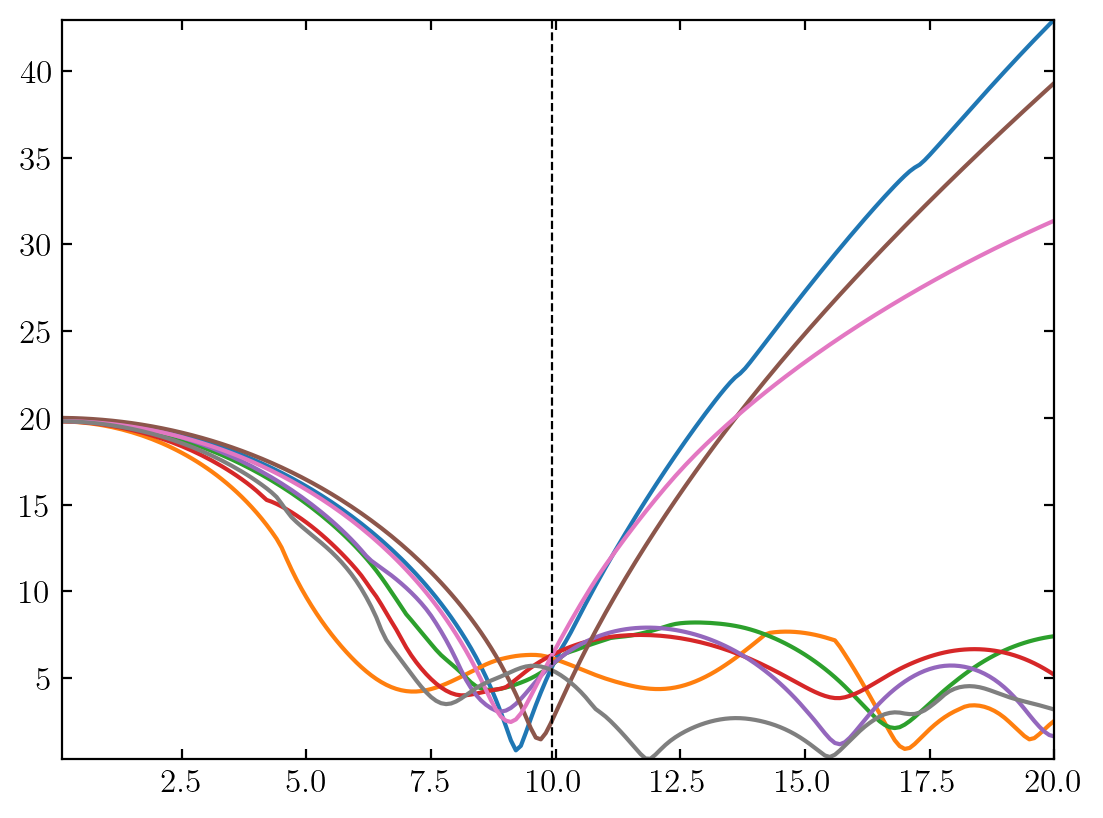

In [18]:
r = np.sqrt(x**2 + y**2 + z**2)
r_i = r[:,0]                                 #i take all points at time 0
mask = (r_i >= 19.8) & (r_i <= 20.2)         #i take only the external ones at time 0
r_ext = r[mask, :]                           #i take the external ones at all times 

#r[0,:] is the same particle at all times 
#r[:,0] is all particles at a specific time

for i in range(len(r_i[mask])):
    plt.plot(t, r_ext[i,:])

rho = np.sum(m)/((4/3)*np.pi*a**3)
G = 1
t_ff = np.sqrt((3*np.pi)/(32*G*rho))
print(t_ff)

plt.axvline(t_ff, color = 'black', ls = '--', lw = .8);

9.934588265796101


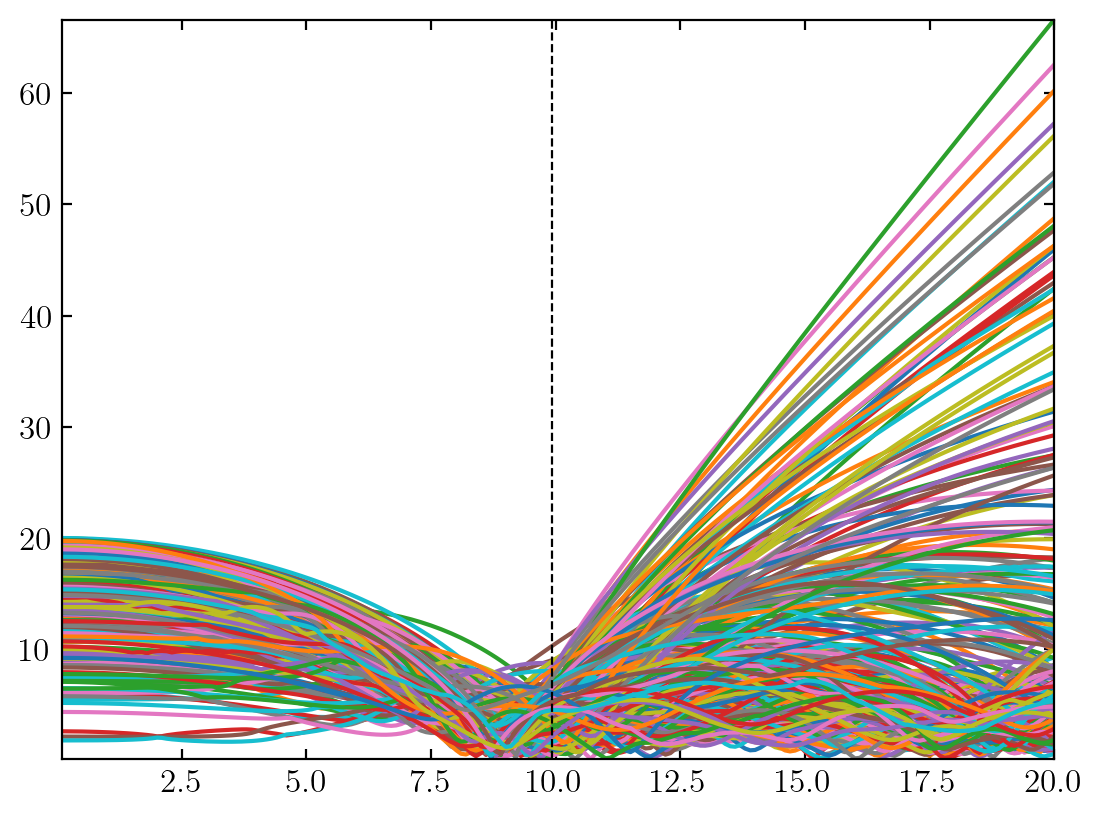

In [19]:
for i in range(len(r)):
    plt.plot(t,r[i,:]);
rho = np.sum(m)/((4/3)*np.pi*a**3)
G = 1
t_ff = np.sqrt((3*np.pi)/(32*G*rho))
print(t_ff)
plt.axvline(t_ff, color = 'black', ls = '--', lw = .8);

### Energy of the system

---

# Animation code

In [ ]:
#calculating the position of the center of mass


In [20]:
# simulation
from matplotlib import animation

def update(num):
    N = len(m)   #N_particles
    ax.clear()
    
    ax.scatter(x[:,num-1], y[:,num-1], z[:,num-1], color = 'red', s = .8)        # Updating Point Location

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)

In [21]:
#print(x)
#print(t)

  0%|          | 0/200 [00:00<?, ?it/s]

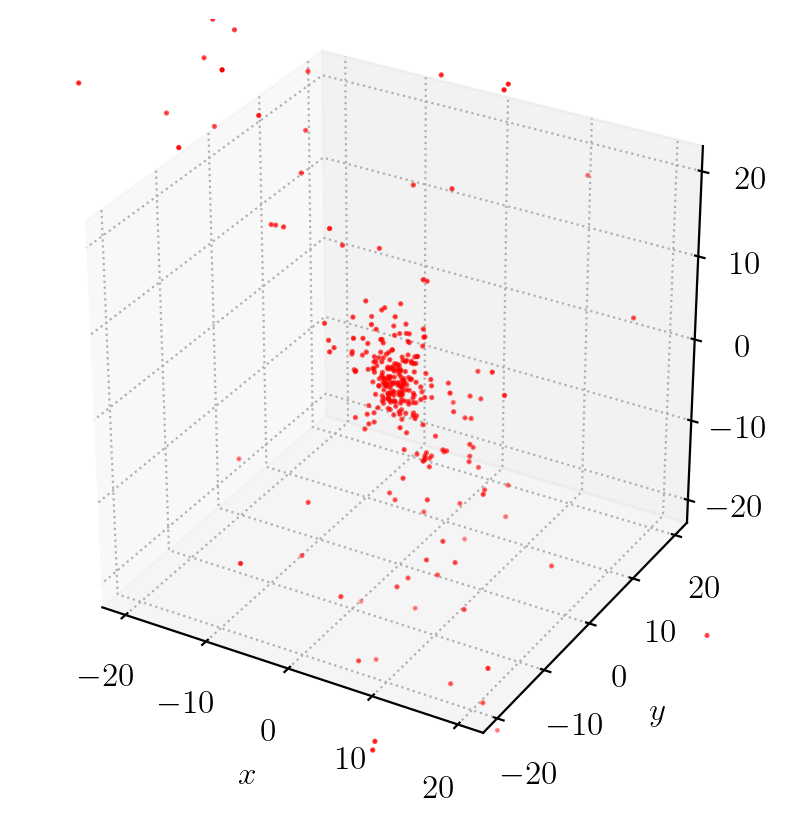

In [22]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')

line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(t))))

# Saving the Animation
f = r"sphere.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)

plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]

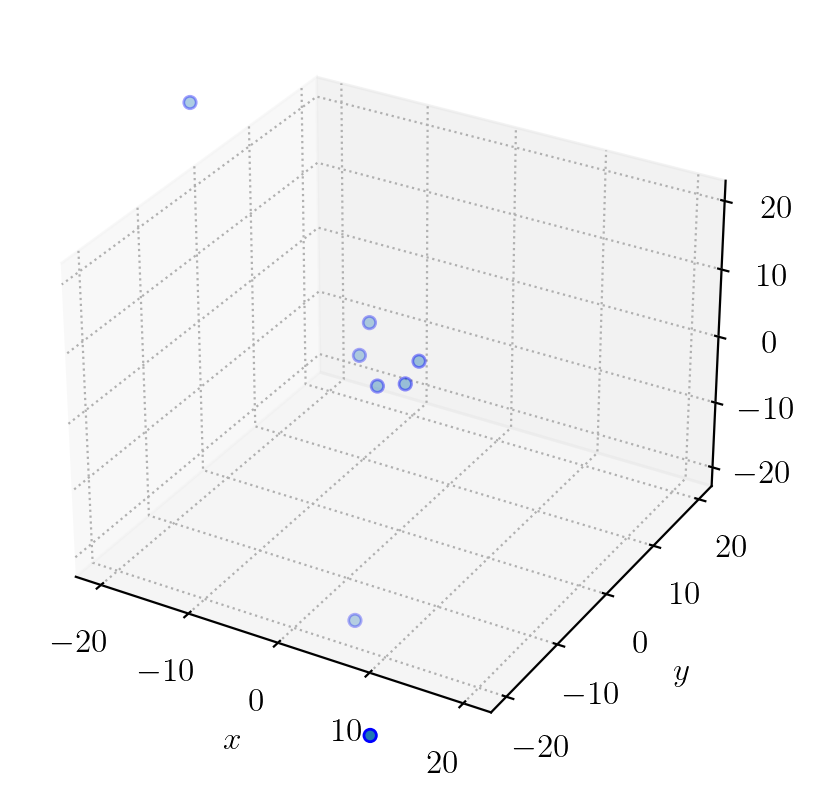

In [24]:
def update_single(num):
    
    N = len(m)   #N_particles
    ax.clear()
    
    ax.scatter(x[mask,num-1], y[mask,num-1], z[mask,num-1])        # Updating Point Location

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, update_single, interval=1,   
                                   frames=tqdm(range(len(t))))

# Saving the Animation
f = r"sphere_particle.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)

plt.show()